In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from models.surface_trap import SurfaceTrap
from models.surface_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot_potential_make_layout, plot_potential

from pytrans.ions import Ca40

from pathlib import Path

_dir = Path('.').resolve() / 'data'

waveform = np.load(_dir / 'waveform_transport.npy')


In [3]:
from pytrans.analysis.simulate1d import simulate_waveform_1d
from pytrans.analysis.simulate import simulate_waveform

In [4]:
trap = SurfaceTrap()

In [6]:
import json

with open(_dir / 'analysis_transport.json', 'r') as fp:
    rj = json.load(fp)[0]


In [7]:
x_eq = np.asarray(rj['mode_solver_results']['x_eq'])
x1 = x_eq[:, 0]

In [8]:
t = np.linspace(0, 25e-6, 400)
# t = np.linspace(0, 300e-6, 2000)
wf = waveform
trap.ion = Ca40

# t = np.linspace(0, 5e-6, 100)
# wf = [waveform[0]]
x0 = x1
# x2 = trap.x_ele(2)
# x0 = [x2 - 2e-6, x2 + 2e-6]
sim = simulate_waveform_1d(trap, wf, t, x0, slowdown=1)

2
Exec simulate_waveform_1d


100%|██████████| 1000/1000 [00:13<00:00, 73.81%/s]


- simulate_waveform_1d elapsed time: 13548.860 ms


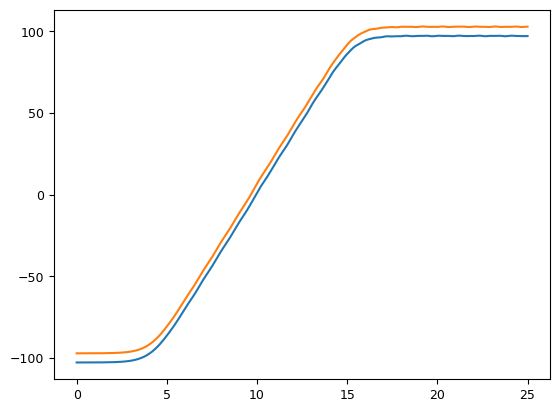

In [9]:
plt.plot(sim.t * 1e6, sim.y[:len(x0)].T *1e6)

In [10]:
ions = [Ca40, Ca40]

# x2 = trap.x_ele(2)
# x2 = [x2 - 2e-6, x2 + 2e-6]
x0 = x_eq.copy()
# x0[:, 0] = [x2 - 2e-6, x2 + 2e-6]

bounds = [(-200e-6, 100e-6), (-10e-6, 10e-6), (trap.z0 - 10e-6, trap.z0 + 10e-6)]

sim3d = simulate_waveform(trap, wf, ions, t, dt=trap.dt, x0=x0, bounds=bounds)


Exec simulate_waveform


  0%|          | 0/1000 [00:00<?, ?%/s]

 64%|██████▍   | 640/1000 [01:12<00:40,  8.80%/s]


- simulate_waveform elapsed time: 72767.998 ms


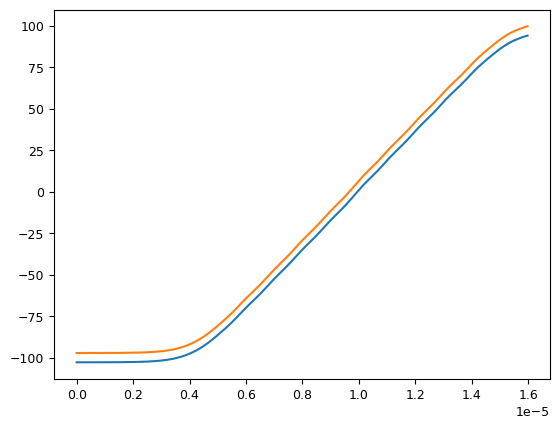

In [11]:
plt.plot(sim3d.t, sim3d.x[:, :, 0] * 1e6)
# plt.plot(sim.t, sim.y[:len(x0)].T *1e6)


In [12]:
sim3d.message


'A termination event occurred.'

In [13]:
sim3d.y_events

[array([[ 9.43941039e+01, -2.53867601e-03,  6.70776559e+01,
          1.00000000e+02,  3.53808519e-03,  6.70845911e+01,
          1.88467675e+02, -8.49209487e-01,  1.65933248e+00,
          1.88554481e+02, -6.69209665e-01,  1.17749516e+00]])]

In [14]:
sim3d.y.shape

(12, 256)

In [15]:
y = sim3d.y[:, 0]
y.shape

N, d = 2, 3
x = y[:N * d]

In [16]:
bounds = [(-200e-6, 0), (-10e-6, 10e-6), (trap.z0 - 10e-6, trap.z0 + 10e-6)]

In [17]:
_x0 = 1e-6
b0 = np.tile([b[0] / _x0 for b in bounds], N)
b1 = np.tile([b[1] / _x0 for b in bounds], N)

def term(x):
    return 1 if np.all(np.bitwise_and(x >= b0, x <= b1)) else -1
